In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_cv(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 模板匹配

In [3]:
lena = cv2.imread('./图像处理/lena.jpg')
template = cv2.imread('./图像处理/face.jpg')
show_cv('face', template)

In [4]:
print('原图大小: ', lena.shape)
print('模板大小: ', template.shape)

原图大小:  (263, 263, 3)
模板大小:  (110, 85, 3)


In [5]:
# 原图形是AxB大小，而模板是axb大小，则输出结果的矩阵是(A-a+1)x(B-b+1)
res = cv2.matchTemplate(lena, template, cv2.TM_SQDIFF)
res.shape

(154, 179)

In [6]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
min_val, max_val, min_loc, max_loc

(256769.0, 200942928.0, (107, 89), (157, 45))

- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关        
- TM_CCORR：计算相关性，计算出来的值越大，越相关
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关

公式：https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

In [7]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [8]:
h, w, c = template.shape
h, w, c

(110, 85, 3)

### 匹配单个对象

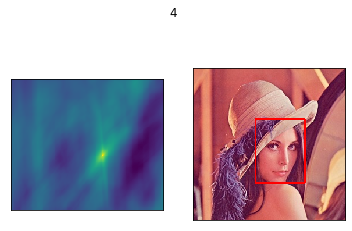

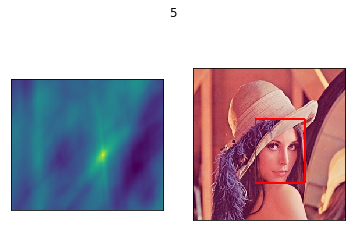

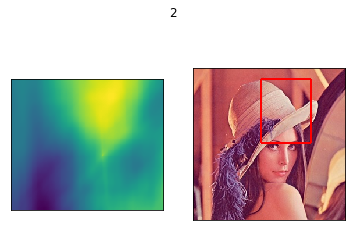

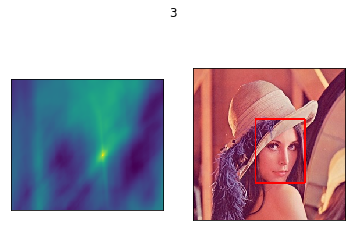

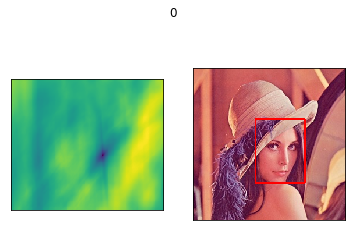

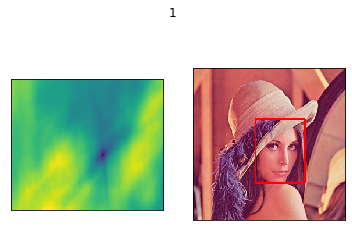

In [9]:
for method in methods:
    img = cv2.cvtColor(lena.copy(), cv2.COLOR_BGR2RGB)
    
    # 匹配方法的真值
    method = eval(method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # 画矩形
    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    
    plt.subplot(121), plt.imshow(res)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.suptitle(method)
    plt.show()

### 匹配多个对象

In [27]:
mario = cv2.imread('./图像处理/mario.jpg')
temp = cv2.imread('./图像处理/mario_coin.jpg')
show_cv('mario', mario)
h, w, c = temp.shape

In [31]:
res = cv2.matchTemplate(mario, temp, cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loca = np.where(res >= threshold)
loca

(array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  41,  41,  41,  41,
         41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  42,  42,
         42,  42,  42,  42,  42,  42,  42,  42,  42,  43,  43,  43,  43,
         43,  72,  72,  72,  72,  72,  72,  72,  72,  72,  72,  72,  73,
         73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,
         73,  73,  73,  73,  73,  73,  73,  74,  74,  74,  74,  74,  74,
         74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  75,  75,  75,
         75,  75,  75,  75, 105, 105, 105, 105, 105, 105, 105]),
 array([ 69,  83,  84,  97,  98, 111, 112, 125, 126,  68,  69,  70,  82,
         83,  84,  96,  97,  98, 110, 111, 112, 124, 125, 126,  68,  69,
         70,  83,  84,  97,  98, 111, 112, 125, 126,  69,  83,  97, 111,
        125,  55,  69,  83,  97,  98, 111, 112, 125, 126, 139, 140,  54,
         55,  56,  68,  69,  70,  82,  83,  84,  96,  97,  98, 110, 111,
        112, 124, 125, 126, 138, 139, 140,  54,  55,  56,  

In [20]:
for pt in zip(*loca[::-1]): # 将行（w）列(h)互换位置，并将行列索引元素组成元组
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(mario, pt, bottom_right, (0,0,255), 2)
show_cv('mario', mario)

## 直方图

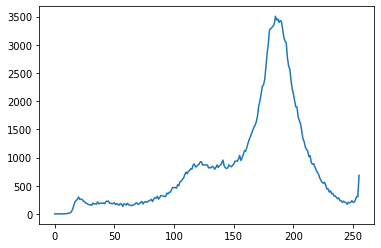

In [42]:
cat = cv2.imread('./图像处理/cat.jpg')
hist = cv2.calcHist([cat], [2], None, [256], [0, 256])
hist.shape
plt.plot(hist)

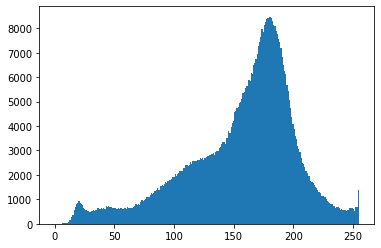

In [39]:
plt.hist(cat.ravel(), 256)
plt.show()

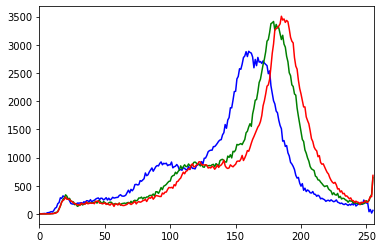

In [43]:
colors = ['b', 'g', 'r']
for i, col in enumerate(colors):
    his = cv2.calcHist([cat], [i], None, [256], [0, 256])
    plt.plot(his, color=col)
    plt.xlim([0, 256])

### mask操作

In [58]:
mask = np.zeros(cat.shape[:2], np.uint8)
print(mask.shape)
mask[100:300, 100:400] = 255
show_cv('mask', mask)

cat_gray = cv2.imread('./图像处理/cat.jpg', 0)
mask_cat = cv2.bitwise_and(cat_gray, cat_gray, mask=mask)
show_cv('mask_cat', mask_cat)

(414, 500)


In [61]:
hist = cv2.calcHist([cat], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([cat], [0], mask, [256], [0,256])

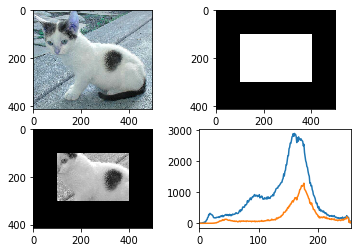

In [62]:
plt.subplot(221), plt.imshow(cat, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(mask_cat, 'gray')
plt.subplot(224), plt.plot(hist), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

### 直方图均衡化

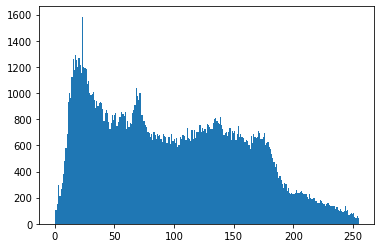

In [63]:
clahe = cv2.imread('./图像处理/clahe.jpg', 0)
plt.hist(clahe.ravel(), 256)
plt.show()

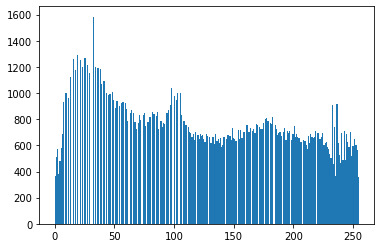

In [64]:
equ = cv2.equalizeHist(clahe)
plt.hist(equ.ravel(), 256)
plt.show()

In [65]:
res = np.hstack((clahe, equ))
show_cv('res', res)

### 自适应均衡化

In [67]:
cl = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
res_clahe = cl.apply(clahe)
res = np.hstack((clahe, equ, res_clahe))
show_cv('res', res)